In [60]:
# Section 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')


In [6]:
# Section 2: Load and Inspect the Dataset
file_path = "Dataset_Food waste.csv"  
data = pd.read_csv(file_path)

# Quick overview of the dataset
print("Dataset Overview:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Overview:
   m49_code  country region  cpc_code     commodity  year  loss_percentage  \
0       104  Myanmar    NaN  23161.02  Rice, milled  2015             1.78   
1       104  Myanmar    NaN  23161.02  Rice, milled  2015            11.77   
2       104  Myanmar    NaN  23161.02  Rice, milled  2015             5.88   
3       104  Myanmar    NaN  23161.02  Rice, milled  2015             3.57   
4       104  Myanmar    NaN  23161.02  Rice, milled  2015            17.65   

  loss_percentage_original loss_quantity activity food_supply_stage  \
0                    1.78%      26.12kgs  Storage           Storage   
1                   11.77%      88.18kgs  Storage           Storage   
2                    5.88%      44.09kgs  Storage           Storage   
3                    3.57%      52.24kgs  Storage           Storage   
4                   17.65%     132.27kgs  Storage           Storage   

                        treatment cause_of_loss sample_size  \
0  30 days storage, wit

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Function to process the 'loss_percentage_original' column
def process_loss_percentage(value):
    if isinstance(value, str):
        value = value.replace(" ", "")  # Remove spaces
        if '%' in value:
            try:
                return float(value.strip('%'))  # Remove '%' and convert to float
            except ValueError:
                return np.nan
        elif '-' in value:  # Handle ranges like '2-10'
            try:
                start, end = map(float, value.split('-'))  # Convert both numbers to float
                return (start + end) / 2  # Take the average
            except ValueError:
                return np.nan
    try:
        return float(value)  # Convert direct numbers
    except (ValueError, TypeError):
        return np.nan

# Load dataset (Ensure you have already loaded 'data' before running this)
if 'loss_percentage_original' in data.columns:
    data['loss_percentage_original'] = data['loss_percentage_original'].astype(str).apply(process_loss_percentage)
else:
    print("Column 'loss_percentage_original' not found in dataset.")

# Handle missing values
data = data.dropna(subset=['loss_percentage_original'])  # Drop rows where this column is NaN
data.fillna(data.mean(numeric_only=True), inplace=True)  # Fill other NaNs with column means

# Encode categorical variables
categorical_cols = ['country', 'commodity', 'activity', 'food_supply_stage', 'treatment', 'cause_of_loss']
for col in categorical_cols:
    if col in data.columns:
        data[col] = data[col].str.lower()
        data[col] = LabelEncoder().fit_transform(data[col].astype(str))

# Normalize numerical columns
scaler = MinMaxScaler()
numerical_cols = ['loss_percentage', 'loss_percentage_original']
for col in numerical_cols:
    if col in data.columns:
        data[col] = scaler.fit_transform(data[[col]])

# Display a sample of the cleaned dataset
data.head()



,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104,72,NaN,23161.02,116,2015,0.027378,0.027378,26.12kgs,123,16,59,348,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
1,104,72,NaN,23161.02,116,2015,0.181071,0.181071,88.18kgs,123,16,120,348,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
2,104,72,NaN,23161.02,116,2015,0.090455,0.090455,44.09kgs,123,16,58,348,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
3,104,72,NaN,23161.02,116,2015,0.054916,0.054916,52.24kgs,123,16,121,348,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
4,104,72,NaN,23161.02,116,2015,0.271533,0.271533,132.27kgs,123,16,128,348,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically


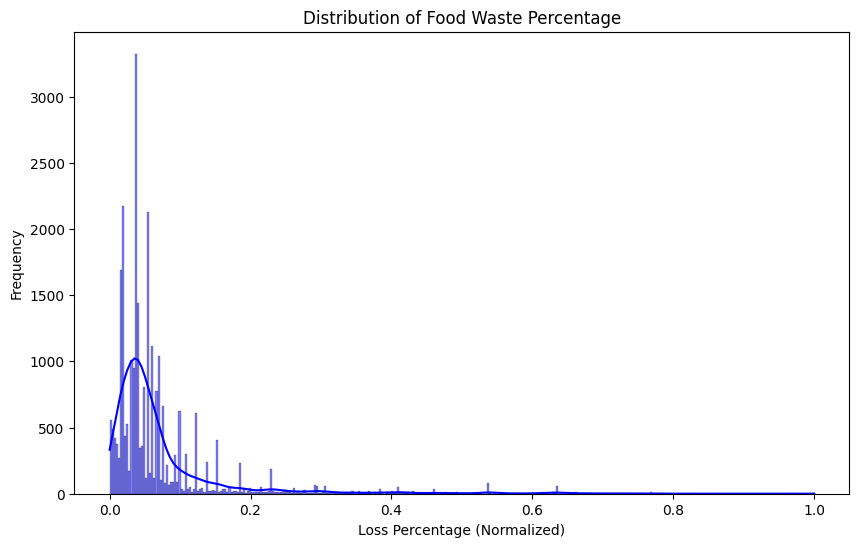

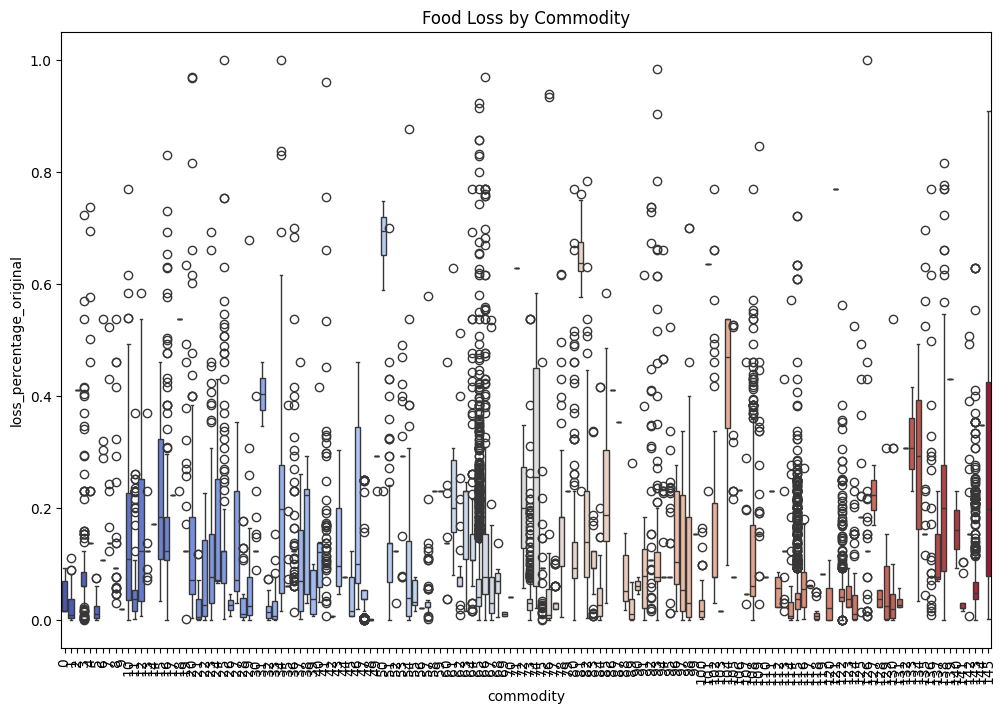

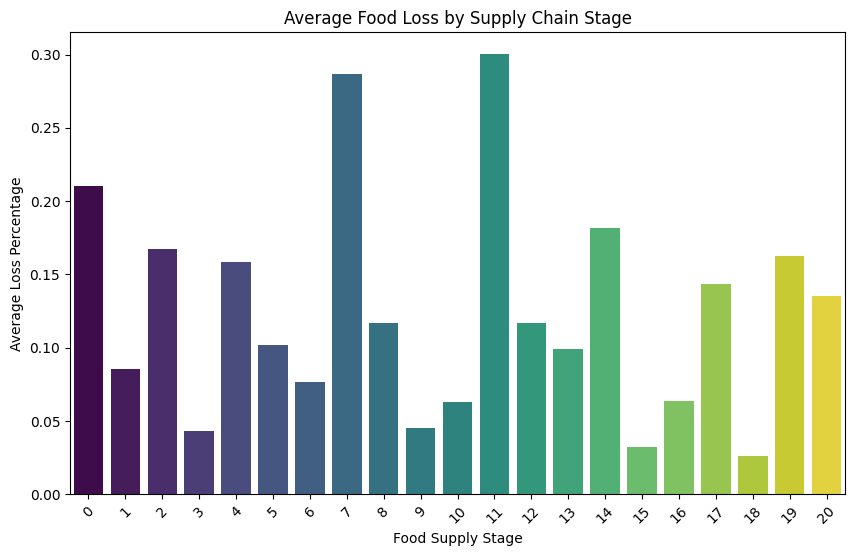

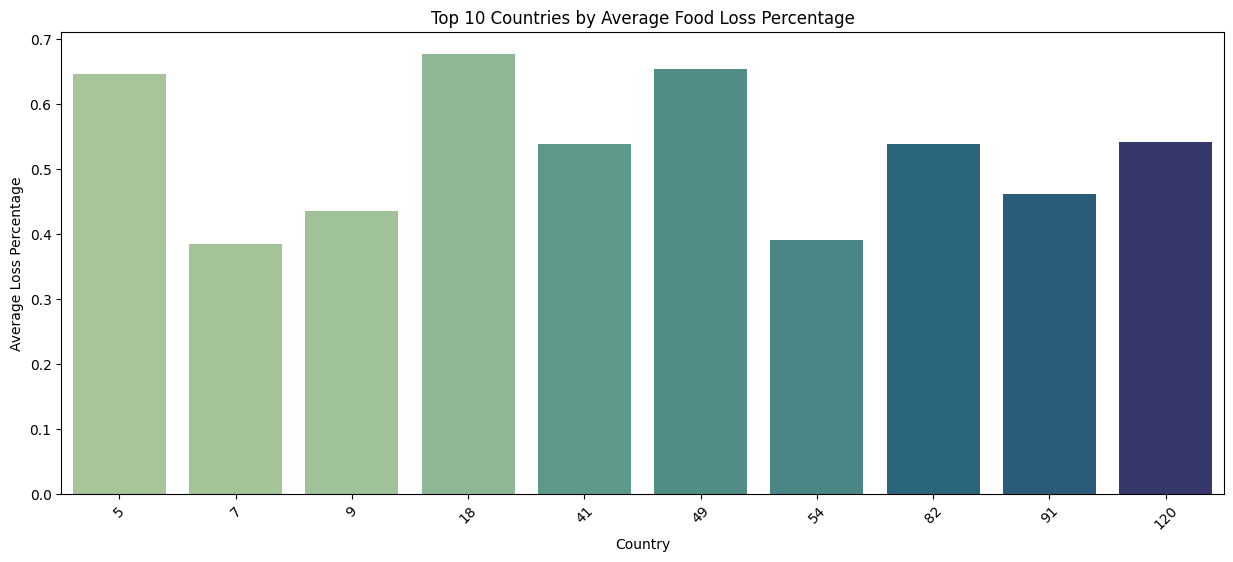

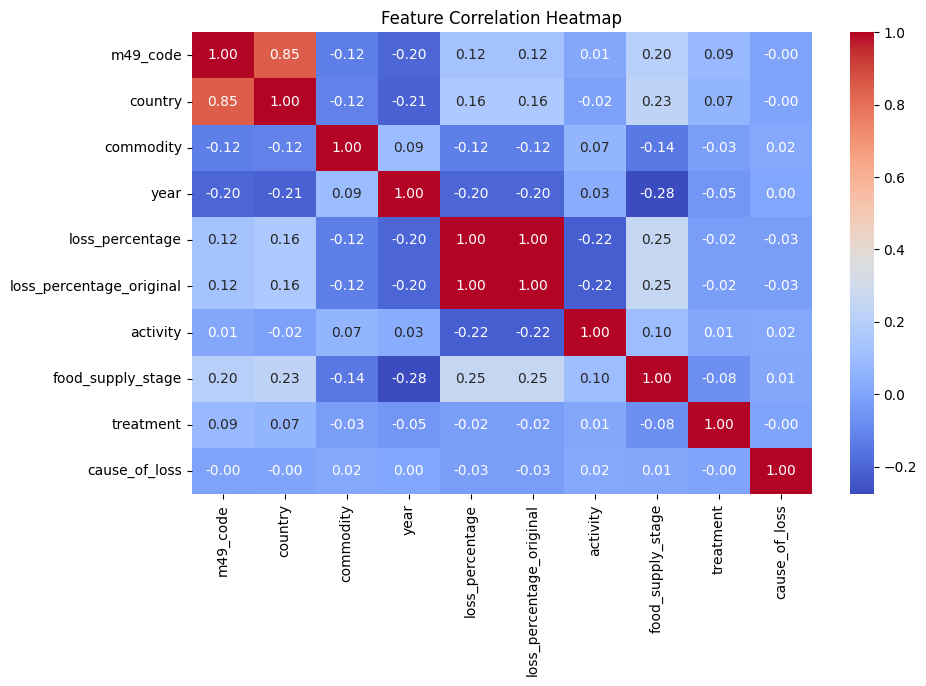

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Section 4: Exploratory Data Analysis (EDA)

# Global distribution of food waste
plt.figure(figsize=(10, 6))
sns.histplot(data['loss_percentage_original'], kde=True, color='blue')
plt.title('Distribution of Food Waste Percentage')
plt.xlabel('Loss Percentage (Normalized)')
plt.ylabel('Frequency')
plt.show()



# Food loss by commodity
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='commodity', y='loss_percentage_original', hue='commodity', palette="coolwarm", legend=False)
plt.title('Food Loss by Commodity')
plt.xticks(rotation=90)
plt.show()



# Food loss by supply stage
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='food_supply_stage', y='loss_percentage_original', errorbar=None, hue='food_supply_stage', palette="viridis", legend=False)
plt.title('Average Food Loss by Supply Chain Stage')
plt.xlabel('Food Supply Stage')
plt.ylabel('Average Loss Percentage')
plt.xticks(rotation=45)
plt.show()



# Food loss across countries
plt.figure(figsize=(15, 6))
top_countries = data.groupby('country')['loss_percentage_original'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.index, palette="crest", legend=False)
plt.title('Top 10 Countries by Average Food Loss Percentage')
plt.xlabel('Country')
plt.ylabel('Average Loss Percentage')
plt.xticks(rotation=45)
plt.show()



# Correlation heatmap (Fix: Select only numerical columns)
numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


Model Performance:
RMSE: 0.00
R² Score: 1.00


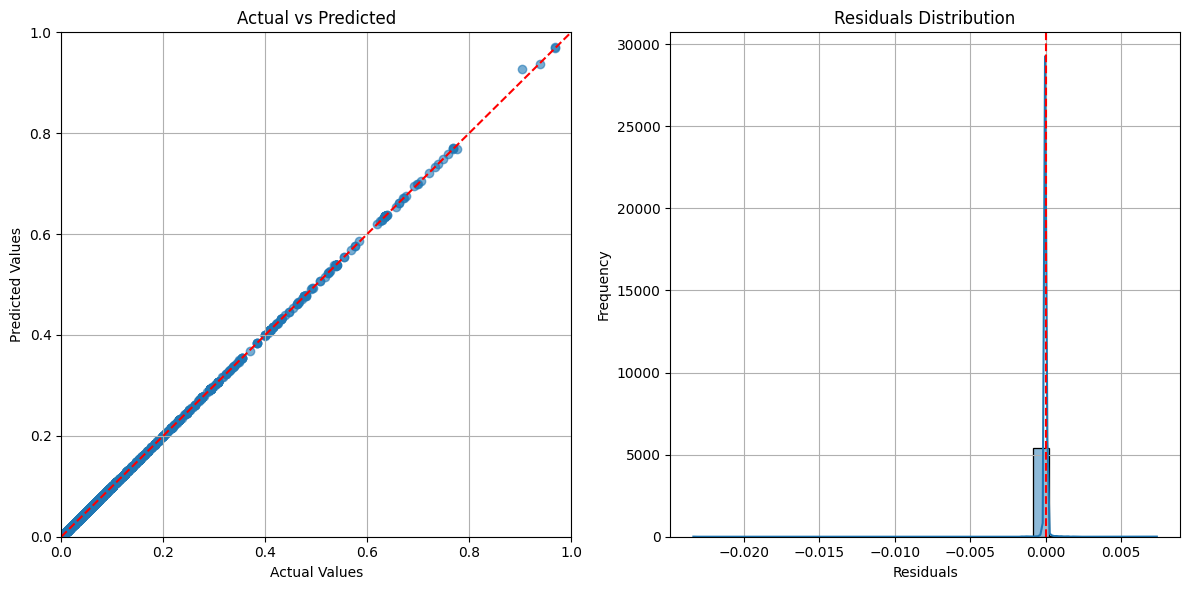

In [48]:
# Section 5: Predictive Modeling

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as mse  # Importing alias for clarity

# Make a copy of the data to avoid modifying the original DataFrame
data_cleaned = data.copy()

# Identify categorical columns
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns.tolist()

# Encode categorical columns using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le  # Store the encoders for future use

# Define features (X) and target (y)
X = data_cleaned.drop(columns=['loss_percentage_original'])
y = data_cleaned['loss_percentage_original']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mse(y_test, y_pred))  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\nRMSE: {rmse:.2f}\nR² Score: {r2:.2f}")


# Visualization of Model Performance

# 1. Scatter plot of actual vs predicted values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line of perfect prediction
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.grid(True)

# 2. Residuals plot
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')  # Line at zero
plt.grid(True)

plt.tight_layout()
plt.show()


Feature Importance Values:
m49_code: 0.0000
country: 0.0000
region: 0.0000
cpc_code: 0.0000
commodity: 0.0000
year: 0.0000
loss_percentage: 1.0000
loss_quantity: 0.0000
activity: 0.0000
food_supply_stage: 0.0000
treatment: 0.0000
cause_of_loss: 0.0000
sample_size: 0.0000
method_data_collection: 0.0000
reference: 0.0000
url: 0.0000
notes: 0.0000


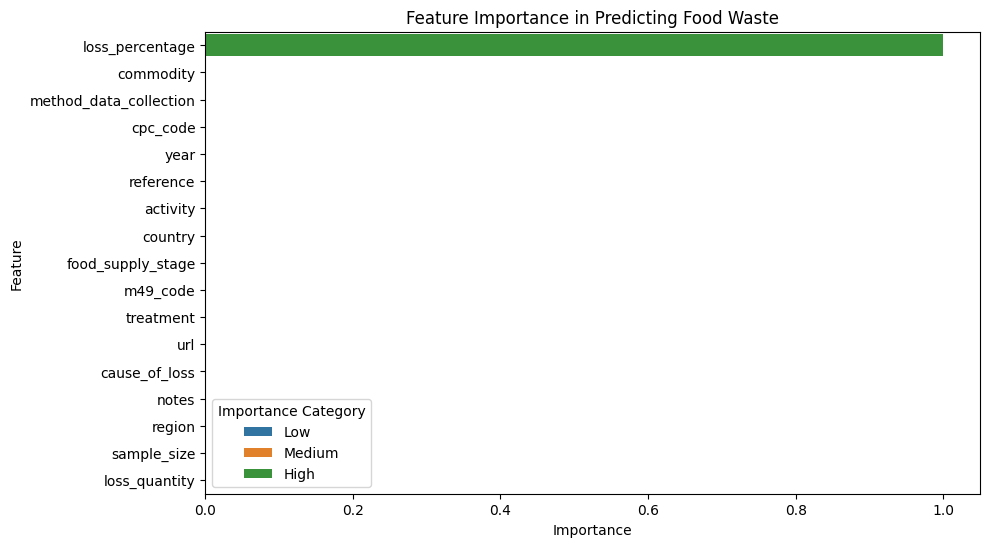

In [58]:
# Section 6: Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Check feature importance values
print("Feature Importance Values:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# Create a hue variable for demonstration (not necessary)
feature_importance['Importance_Category'] = pd.cut(feature_importance['Importance'], bins=3, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', hue='Importance_Category', dodge=False)
plt.title('Feature Importance in Predicting Food Waste')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend(title='Importance Category')
plt.show()



Top Factors Influencing Food Waste:
                   Feature  Importance Importance_Category
6          loss_percentage    0.999969                High
4                commodity    0.000005                 Low
13  method_data_collection    0.000004                 Low
3                 cpc_code    0.000004                 Low
5                     year    0.000003                 Low


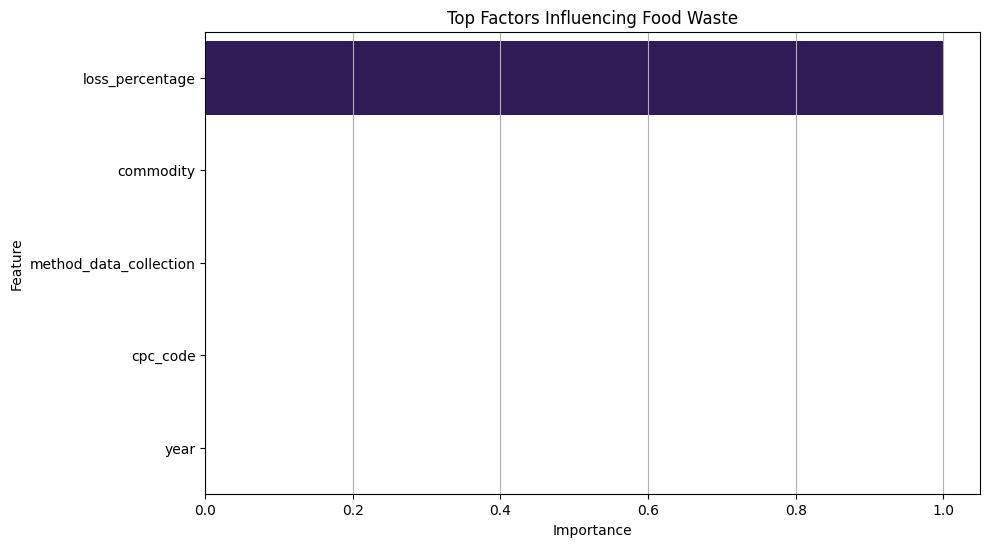

In [68]:
# Section 7: Insights and Recommendations
# Print top features influencing food waste
print("Top Factors Influencing Food Waste:")
print(feature_importance.head())

import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of Top Features
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Importance', y='Feature', palette='magma')
plt.title('Top Factors Influencing Food Waste')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x')  # Add gridlines for better readability
plt.show()
